<a href="https://colab.research.google.com/github/mia1996/rlcard-tutoirial/blob/master/blackjack_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <a href='https://github.com/datamllab/rlcard'> <center> <img src='https://miro.medium.com/max/1000/1*_9abDpNTM9Cbsd2HEXYm9Q.png' width=500 class='center' /></a> 

## **Deep-Q Learning on Blackjack**
This example is to use Deep-Q learning to train an agent on Blackjack. We aim to use this example to show how reinforcement learning algorithms can be developed and applied in our toolkit. We design a run function which plays one complete game and provides the data for training RL agents. The example is shown below:


* First, we install Rlcard and Tensorflow. To use Tensorflow implementation of the example algorithms, we recommend to install the supported verison of Tensorflow with `rlcard[tensorflow]`.

In [0]:
pip install rlcard

     |████████████████████████████████| 6.7MB 5.2MB/s 
  Created wheel for rlcard: filename=rlcard-0.2.4-cp36-none-any.whl size=6746015 sha256=baaa4f1b86f883fb4d5b9d9e0f229d1bd57a6263f1e9e26132d3e0436e1a00b4
  Stored in directory: /root/.cache/pip/wheels/c3/a0/b5/bb8f10f5f5b3b8727ee0a135432168c3860ee23558366a4b5a
Successfully built rlcard


In [0]:
pip install rlcard[tensorflow]

     |████████████████████████████████| 110.5MB 46kB/s 
     |████████████████████████████████| 3.8MB 44.3MB/s 
     |████████████████████████████████| 512kB 46.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=919a1271129880057ca8c67557868dd703da4e7e91244cf80bc98b835ac32fe4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

* Then, we import the modules that are wraped up in rlcard packages. Then, we set the iterations numbers, the initial memory size and how frequently we evaluate the performance. Finally, we save the performance data and learning curves to our current path as ./log.

In [0]:
import tensorflow as tf
import os

import rlcard
from rlcard.agents import DQNAgent
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger

In [0]:
# Make environment
env = rlcard.make('blackjack', config={'seed': 0})
eval_env = rlcard.make('blackjack', config={'seed': 0})

In [0]:
# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 10000
episode_num = 5000

# The intial memory size
memory_init_size = 100

# Train the agent every X steps
train_every = 1

# The paths for saving the logs and learning curves
log_dir = './experiments/blackjack_dqn_result/'

# Set a global seed
tf.compat.v1.set_random_seed(0)

* Before starting the training process, we initial a global step and set up the DQN agents. The Logger is used to plot the learning curve and save it to the same directory as we set up for log. After training the game, we could see the training performance and plot as below.

In [0]:
with tf.Session() as sess:

    # Initialize a global step
    global_step = tf.Variable(0, name='global_step', trainable=False)

    # Set up the agents
    agent = DQNAgent(sess,
                     scope='dqn',
                     action_num=env.action_num,
                     replay_memory_init_size=memory_init_size,
                     train_every=train_every,
                     state_shape=env.state_shape,
                     mlp_layers=[10,10])
    env.set_agents([agent])
    eval_env.set_agents([agent])

    # Initialize global variables
    sess.run(tf.global_variables_initializer())

    # Init a Logger to plot the learning curve
    logger = Logger(log_dir)

    for episode in range(episode_num):

        # Generate data from the environment
        trajectories, _ = env.run(is_training=True)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            agent.feed(ts)

        # Evaluate the performance. Play with random agents.
        if episode % evaluate_every == 0:
            logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])



Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.





Instructions for updating:
Please switch to tf.train.get_global_step

----------------------------------------
  timestep     |  1
  reward       |  -0.7364
----------------------------------------
INFO - Agent dqn, step 100, rl-loss: 1.0503010749816895WARNING:tensorflow:

./experiments/blackjack_dqn_result/performance.csv


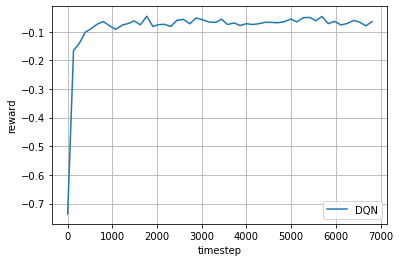

In [0]:
    # Close files in the logger
    logger.close_files()

    # Plot the learning curve
    logger.plot('DQN')
    

#### In Blackjack, the player will get a payoff at the end of the game:
1 if the player wins, -1 if the player loses, and 0 if it is a tie. The performance is measured by the average payoff the player obtains by playing 10000 episodes. The above example shows that the agent achieves better and better performance during training. The logs and learning curves are saved in ./experiments/blackjack_dqn_result/.

### Now you have your trained Blackjack game!